In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve #画学习曲线
from sklearn.model_selection import ShuffleSplit #设定交叉验证模式
from time import time
import datetime

In [3]:
digi = load_digits()
x,y = digi.data,digi.target

In [4]:
x.shape

(1797, 64)

In [6]:
x #是一个稀疏矩阵

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [28]:
clf = GaussianNB()
cv = ShuffleSplit(n_splits=50 #将数据分为几份
                  ,test_size=0.2 #20% *50 份的数据会被作为测试集
                  ,random_state=1 #分交叉验证的份数的时候,进行的随机抽样模式
                  )

In [29]:
train_sizes, train_scores, test_scores = learning_curve(clf, x, y
                                                        ,cv=cv #表示交叉验证模式
                                                        ,n_jobs=3)    

In [30]:
train_sizes #每次分训练集和测试集建模之后, 训练集上的样本数量

array([ 143,  467,  790, 1113, 1437])

In [31]:
train_scores.shape

(5, 50)

In [32]:
train_scores

array([[0.95804196, 0.94405594, 0.97202797, 0.97902098, 0.95104895,
        0.97202797, 0.96503497, 0.93706294, 0.88111888, 0.95104895,
        0.93706294, 0.94405594, 0.99300699, 0.97202797, 0.96503497,
        0.96503497, 0.94405594, 0.8951049 , 0.93006993, 0.97902098,
        0.83216783, 0.95804196, 0.95104895, 0.95804196, 0.97202797,
        0.96503497, 0.92307692, 0.95804196, 0.96503497, 0.90909091,
        0.91608392, 0.95104895, 0.90909091, 0.95104895, 0.98601399,
        0.95104895, 0.93706294, 0.96503497, 0.96503497, 0.92307692,
        0.95104895, 0.95804196, 0.87412587, 0.97902098, 0.95104895,
        0.95104895, 0.97202797, 0.91608392, 0.97202797, 0.9020979 ],
       [0.84582441, 0.8993576 , 0.91648822, 0.9143469 , 0.90578158,
        0.90149893, 0.88222698, 0.87366167, 0.8993576 , 0.88222698,
        0.92077088, 0.87152034, 0.90149893, 0.92933619, 0.91220557,
        0.87366167, 0.8993576 , 0.86723769, 0.90149893, 0.9143469 ,
        0.88865096, 0.88650964, 0.90364026, 0.8

In [33]:
test_scores.shape

(5, 50)

In [34]:
test_scores

array([[0.80277778, 0.76666667, 0.76666667, 0.79166667, 0.73333333,
        0.76944444, 0.80277778, 0.73888889, 0.725     , 0.78333333,
        0.75833333, 0.78333333, 0.78055556, 0.83055556, 0.76111111,
        0.82777778, 0.69166667, 0.75      , 0.725     , 0.79722222,
        0.70555556, 0.80555556, 0.75      , 0.75277778, 0.78888889,
        0.78888889, 0.71666667, 0.78611111, 0.71111111, 0.85      ,
        0.775     , 0.75833333, 0.79166667, 0.78055556, 0.83333333,
        0.7       , 0.77777778, 0.75833333, 0.77222222, 0.8       ,
        0.78888889, 0.74166667, 0.73611111, 0.79722222, 0.73611111,
        0.73888889, 0.78333333, 0.79444444, 0.775     , 0.775     ],
       [0.81111111, 0.85833333, 0.825     , 0.86388889, 0.81111111,
        0.89166667, 0.81111111, 0.81944444, 0.80555556, 0.83055556,
        0.84722222, 0.78333333, 0.81944444, 0.9       , 0.83888889,
        0.825     , 0.85      , 0.81666667, 0.85      , 0.85833333,
        0.85      , 0.81944444, 0.83333333, 0.8

In [35]:
def plot_learning_curve(estimator, #分类器
                        title, 
                        X, y, #特征矩阵与标签
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    #
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,cv=cv #表示交叉验证模式
                                                            ,n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
           , color="r",label="Training score")                #训练图像
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-' 
           , color="g",label="Test score")                    #测试图像
    ax.legend(loc="best")
    return ax

In [36]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"] 
model = [GaussianNB(),DTC(),SVC(gamma=0.001),RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]

In [37]:
[*zip(range(len(title)),title,model)]

[(0, 'Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 (1,
  'DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 (2,
  'SVM, RBF kernel',
  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 (3,
  'RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_dec

Naive Bayes:00:04:002264
DecisionTree:00:02:196126
SVM, RBF kernel:00:11:328702
RandomForest:00:17:230948
Logistic:00:56:406110


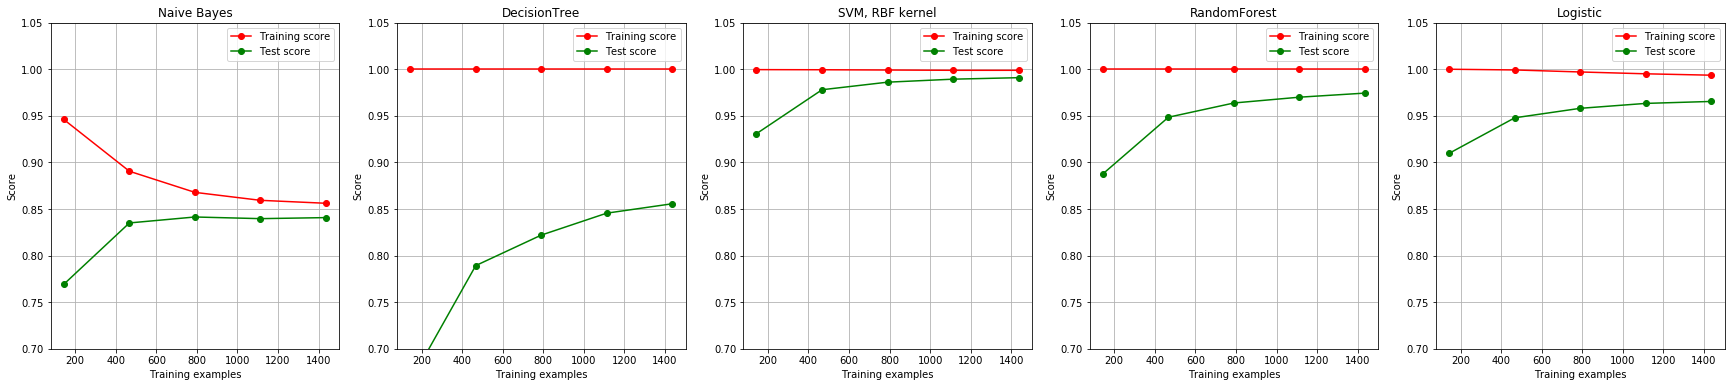

In [47]:
fig,axes = plt.subplots(1,5,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times=time()
    plot_learning_curve(estimator,title_,x,y,ax=axes[ind],ylim=[0.7,1.05],n_jobs=4,cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()    

In [ ]:
#少量的样本时,bayes会好点,样本越多计算的概率越多,准确率下降,且难用调参优化; bayes速度较快,高维度数据计算速度有优势
#决策树容易过拟合,但可以通过调参,剪枝等优化